In [1]:
import pandas as pd

In [2]:
count_dataframe = pd.read_csv('EPCounts.csv',sep='\t',index_col=0)
print(count_dataframe.head(2))

            AAACCCACAGCTATTG-1  AAACCCATCGCCTTTG-1  AAACGAACACCTAAAC-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL627309.3                 0.0                 0.0                 0.0   

            AAACGAACATAGTCAC-1  AAACGAATCTTGGGCG-1  AAACGCTAGAGAGGGC-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL627309.3                 0.0                 0.0                 0.0   

            AAACGCTCACGCAGTC-1  AAACGCTCACTGATTG-1  AAACGCTCAGTTAGAA-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL627309.3                 0.0                 0.0                 0.0   

            AAACGCTGTCTGCCTT-1         ...          TTTGTTGCAGCGTACC-1  \
AL627309.1                 0.0         ...                         0.0   
AL627309.3                 0.0         ...                         0.0   

            TTTGTTGCAGTCTACA-1  TTTGTTGGTCACTTAG-1  TTTGTTGGTCTCAGAT-1  \
AL627309.1                 0.0    

In [3]:
count_dataframe=count_dataframe.transpose()
print(count_dataframe.head(2))

                    AL627309.1  AL627309.3  AL732372.1  AC114498.1  \
AAACCCACAGCTATTG-1         0.0         0.0         0.0         0.0   
AAACCCATCGCCTTTG-1         0.0         0.0         0.0         0.0   

                    AL669831.5  FAM87B  LINC00115  FAM41C  AL645608.3  \
AAACCCACAGCTATTG-1         0.0     0.0        0.0     0.0         0.0   
AAACCCATCGCCTTTG-1         0.0     0.0        0.0     0.0         0.0   

                    AL645608.1     ...      BX004987.1  AC145212.1  MAFIP  \
AAACCCACAGCTATTG-1         0.0     ...             0.0         0.0    0.0   
AAACCCATCGCCTTTG-1         0.0     ...             0.0         0.0    0.0   

                    AC011043.1  AL592183.1  AC007325.4  AC007325.2  \
AAACCCACAGCTATTG-1         0.0         0.0         0.0         0.0   
AAACCCATCGCCTTTG-1         0.0         0.0         0.0         0.0   

                    AL354822.1  AC004556.1  AC240274.1  
AAACCCACAGCTATTG-1    0.000000         0.0         0.0  
AAACCCATCGCC

In [4]:
print(count_dataframe.shape)

(8465, 24301)


In [5]:
metadata_dataframe = pd.read_csv('EPMeta.txt',sep='\t',index_col=0)

In [6]:
print(metadata_dataframe.head(2))
print(metadata_dataframe.shape)

                    cell_type
Cell                         
AAACCCACAGCTATTG-1          1
AAACCCATCGCCTTTG-1          1
(8465, 1)


In [7]:
import scanpy as sc

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [8]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata)

AnnData object with n_obs × n_vars = 8465 × 24301 
    obs: 'cell_type'


In [9]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  9


In [10]:
adata.write('./Downloads/data/EP.h5ad') ## the h5ad extension is AnnData-specific

In [11]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
Cell                                                                           
AAACCCACAGCTATTG-1               3141                 8.052615   3192.516846   
AAACCCATCGCCTTTG-1               3552                 8.175548   3008.322754   

                    log1p_total_counts  pct_counts_in_top_50_genes  \
Cell                                                                 
AAACCCACAGCTATTG-1            8.068878                    6.392475   
AAACCCATCGCCTTTG-1            8.009470                    7.022620   

                    pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
Cell                                                                           
AAACCCACAGCTATTG-1                    11.477363                    18.706359   
AAACCCATCGCCTTTG-1                    12.641853                    20.354298   

                    pct_counts_in

In [12]:
import matplotlib.pyplot as plt
import numpy as np

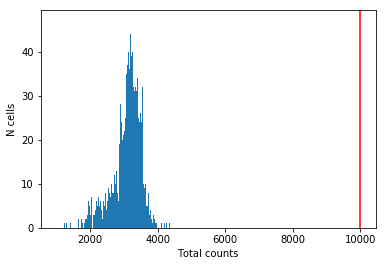

In [13]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(10000, color='red')

In [14]:
sc.pp.filter_cells(adata,min_genes=200)
sc.pp.filter_genes(adata,min_cells=3)

In [15]:
adata

AnnData object with n_obs × n_vars = 8465 × 22010 
    obs: 'cell_type', 'n_genes'
    var: 'ERCC', 'n_cells'

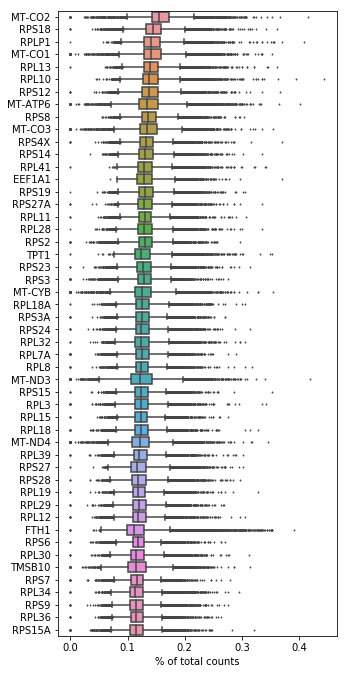

In [16]:
sc.pl.highest_expr_genes(adata,n_top=50)

In [17]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['n_counts'] = adata.X.sum(axis=1)

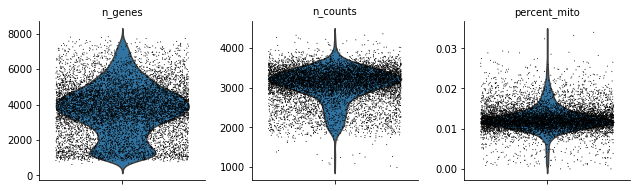

In [18]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [19]:
adata = adata[adata.obs['n_genes'] < 4000, :]
adata = adata[adata.obs['percent_mito'] < 0.3, :]

In [20]:
adata

View of AnnData object with n_obs × n_vars = 4736 × 22010 
    obs: 'cell_type', 'n_genes', 'percent_mito', 'n_counts'
    var: 'ERCC', 'n_cells'

In [21]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

Trying to set attribute `.obs` of view, making a copy.


In [22]:
adata.raw = adata

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

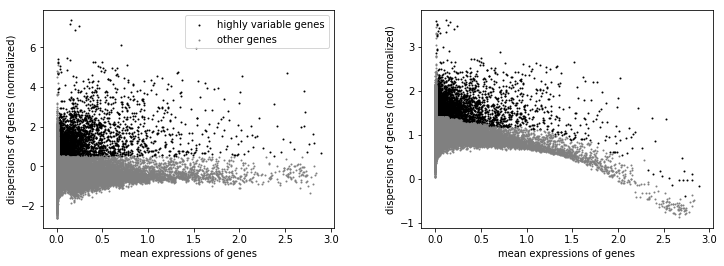

In [24]:
sc.pl.highly_variable_genes(adata)

In [25]:
adata = adata[:, adata.var['highly_variable']]

In [26]:
adata

View of AnnData object with n_obs × n_vars = 4736 × 4278 
    obs: 'cell_type', 'n_genes', 'percent_mito', 'n_counts'
    var: 'ERCC', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [27]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

In [28]:
sc.pp.scale(adata, max_value=10)

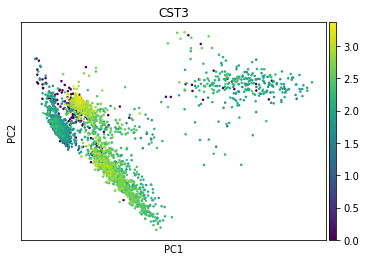

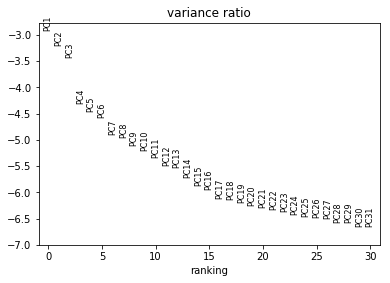

In [29]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)

In [30]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=6)

In [31]:
sc.tl.tsne(adata)

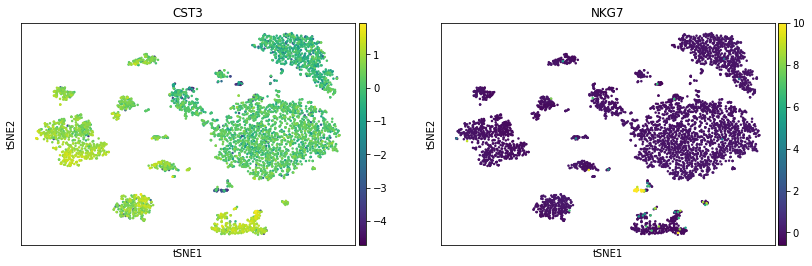

In [42]:
sc.pl.tsne(adata, color=['CST3', 'NKG7'], use_raw=False)

In [33]:
pip install scanpy[leiden]

Note: you may need to restart the kernel to use updated packages.


In [86]:
obj = sc.tl.leiden(adata,resolution = 0.5)
print(adata)

AnnData object with n_obs × n_vars = 4736 × 4278 
    obs: 'cell_type', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'leiden_1.4'
    var: 'ERCC', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'draw_graph', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_tsne', 'X_draw_graph_fa'
    varm: 'PCs'


In [129]:
print((adata.obs['leiden'].values)[-1])

15


['15', '15', '16', '17', '17', '18', '20', '20', '21', '22', '24', '27', '27', '27', '26', '28', '27', '29', '29', '29']
[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4, 1.4500000000000002, 1.5, 1.55]


Text(0, 0.5, 'number of clusters')

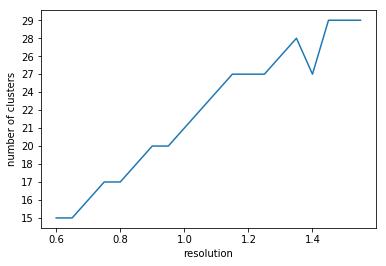

In [134]:
n_cluster = []
res = []
for i in range(20):
    sc.tl.leiden(adata,resolution = 0.5 + 0.05*i)
    (adata.obs['leiden'].values).sort_values(inplace=True)
    n_cluster.append(adata.obs['leiden'].values[-1])
    res.append(0.6 + 0.05*i)
    #print(i)
print(n_cluster)
print(res)
plt.plot(res,n_cluster)
plt.xlabel('resolution')
plt.ylabel('number of clusters')

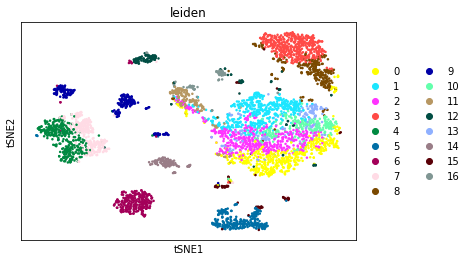

In [80]:
sc.tl.leiden(adata,resolution = 0.6)
sc.pl.tsne(adata, color=['leiden'])

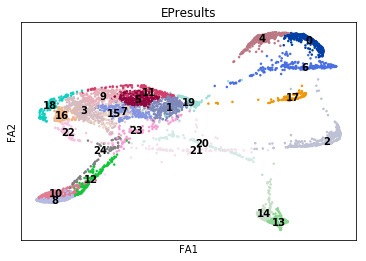

In [38]:
sc.tl.draw_graph(adata)

sc.pl.draw_graph(adata, color='leiden', legend_loc='on data',title = "EPresults")

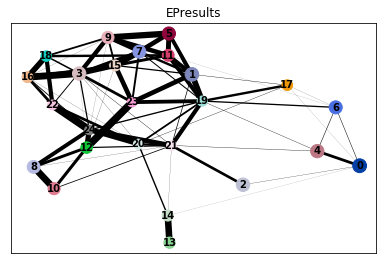

In [39]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden'],title = "EPresults")

In [136]:
IPcount_dataframe = pd.read_csv('ITGA6TB_count.csv',index_col=0)
print(IPcount_dataframe.head(2))

            AAACCCACAGGATCTT  AAACCCACAGTCTGGC  AAACCCAGTGATATAG  \
AL627309.1               0.0               0.0               0.0   
AC114498.1               0.0               0.0               0.0   

            AAACCCAGTTACGGAG  AAACCCAGTTGCCGAC  AAACCCATCCATTGCC  \
AL627309.1               0.0               0.0               0.0   
AC114498.1               0.0               0.0               0.0   

            AAACCCATCCATTTGT  AAACCCATCCCATTCG  AAACCCATCTTACGGA  \
AL627309.1               0.0               0.0               0.0   
AC114498.1               0.0               0.0               0.0   

            AAACGAACACAGTGTT        ...         TTTGGTTGTGTGTGTT  \
AL627309.1               0.0        ...                      0.0   
AC114498.1               0.0        ...                      0.0   

            TTTGGTTTCATCGACA  TTTGGTTTCGGTGCAC  TTTGTTGAGATTGTGA  \
AL627309.1               0.0               0.0               0.0   
AC114498.1               0.0               0

In [137]:
IPcount_dataframe = IPcount_dataframe.transpose()
print(IPcount_dataframe.head(2))

                  AL627309.1  AC114498.1  AL669831.5  LINC00115  FAM41C  \
AAACCCACAGGATCTT         0.0         0.0         0.0        0.0     0.0   
AAACCCACAGTCTGGC         0.0         0.0         0.0        0.0     0.0   

                  AL645608.2  SAMD11     NOC2L  KLHL17  PLEKHN1     ...      \
AAACCCACAGGATCTT         0.0     0.0  0.820492     0.0      0.0     ...       
AAACCCACAGTCTGGC         0.0     0.0  0.000000     0.0      0.0     ...       

                    MT-CYB  AC136616.1  BX004987.1  AC145212.1  MAFIP  \
AAACCCACAGGATCTT  3.450585         0.0         0.0         0.0    0.0   
AAACCCACAGTCTGGC  4.217883         0.0         0.0         0.0    0.0   

                  AC011043.1  AL592183.1  AC007325.4  AL354822.1  AC240274.1  
AAACCCACAGGATCTT         0.0         0.0         0.0         0.0         0.0  
AAACCCACAGTCTGGC         0.0         0.0         0.0         0.0         0.0  

[2 rows x 18768 columns]


In [144]:
print(IPcount_dataframe.shape)

(10692, 18768)


In [186]:
IPmetadata_dataframe = pd.read_csv('ITGA6TB_meta.csv',index_col=0)
#IPmetadata_dataframe = IPmetadata_dataframe.transpose()
print(IPmetadata_dataframe.head(2))

                  RNA_snn_res.0.1  RNA_snn_res.0.25  RNA_snn_res.0.3  \
AAACCCACAGGATCTT                0                 0                0   
AAACCCACAGTCTGGC                1                 1                1   

                             scHCL_celltype  
AAACCCACAGGATCTT   SCT.Placenta_VentoTormo.  
AAACCCACAGTCTGGC  VCT2.Placenta_VentoTormo.  


In [187]:
IPadata = sc.AnnData(X = IPcount_dataframe, obs = IPmetadata_dataframe)
print(IPadata)

AnnData object with n_obs × n_vars = 10692 × 18768 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype'


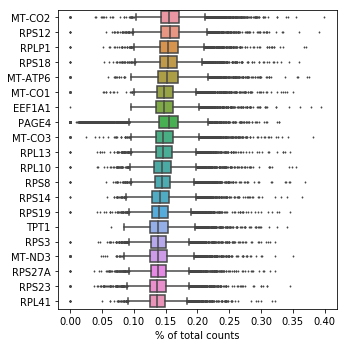

In [188]:
sc.pl.highest_expr_genes(IPadata, n_top=20)

In [189]:
sc.pp.filter_cells(IPadata,min_genes = 200)
sc.pp.filter_genes(IPadata,min_cells = 3)

In [190]:
IPadata

AnnData object with n_obs × n_vars = 10692 × 18263 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes'
    var: 'n_cells'

In [191]:
mito_genes = IPadata.var_names.str.startswith('MT-')
IPadata.obs['percent_mito'] = np.sum(
    IPadata[:, mito_genes].X, axis=1) / np.sum(IPadata.X, axis=1)
IPadata.obs['n_counts'] = IPadata.X.sum(axis=1)

... storing 'scHCL_celltype' as categorical


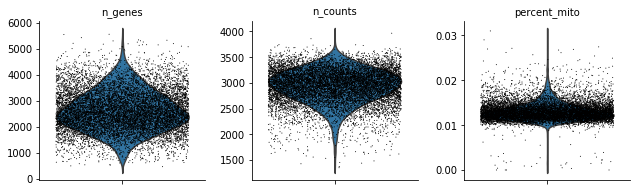

In [192]:
sc.pl.violin(IPadata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [193]:
IPadata = IPadata[IPadata.obs['n_genes'] < 4000, :]
IPadata = IPadata[IPadata.obs['percent_mito'] < 0.15, :]

In [194]:
IPadata

View of AnnData object with n_obs × n_vars = 10205 × 18263 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

In [195]:
sc.pp.normalize_per_cell(IPadata, counts_per_cell_after=1e4)
sc.pp.log1p(IPadata)

Trying to set attribute `.obs` of view, making a copy.


In [196]:
IPadata.raw = IPadata

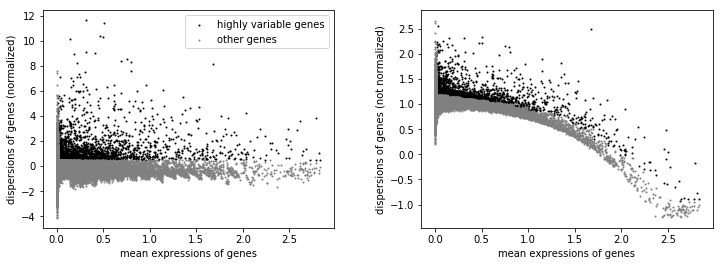

In [197]:
sc.pp.highly_variable_genes(IPadata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(IPadata)

In [198]:
IPadata = IPadata[:, IPadata.var['highly_variable']]

In [199]:
IPadata

View of AnnData object with n_obs × n_vars = 10205 × 2280 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [200]:
sc.pp.regress_out(IPadata, ['n_counts', 'percent_mito'])
sc.pp.scale(IPadata, max_value=10)

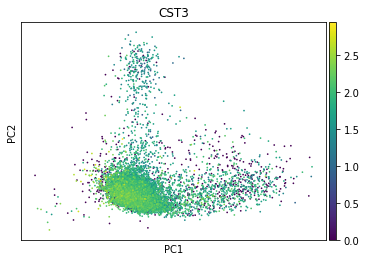

In [201]:
sc.tl.pca(IPadata, svd_solver='arpack')
sc.pl.pca(IPadata, color='CST3')

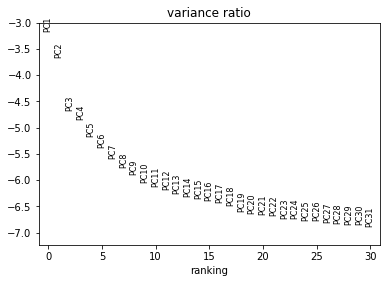

In [202]:
sc.pl.pca_variance_ratio(IPadata, log=True)

In [203]:
sc.pp.neighbors(IPadata, n_neighbors=10, n_pcs=10)

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


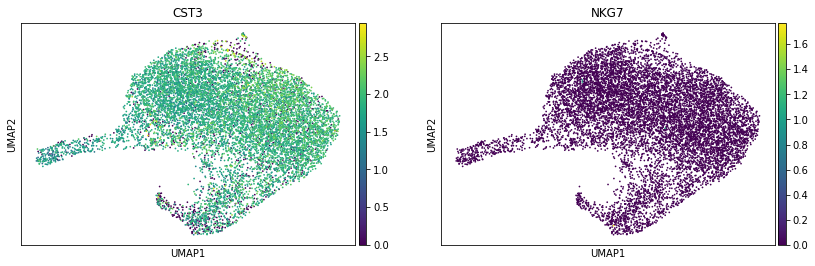

In [204]:
sc.tl.umap(IPadata)
sc.pl.umap(IPadata, color=['CST3', 'NKG7'])

In [217]:
IPadata

AnnData object with n_obs × n_vars = 10205 × 2280 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

['3', '4', '5', '5', '5', '6', '7', '9', '9', '10', '9', '11', '11', '11', '13', '16', '17', '16', '19', '18']
[0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35, 0.4, 0.45000000000000007, 0.5, 0.55, 0.6, 0.65, 0.7000000000000001, 0.75, 0.8, 0.85, 0.9, 0.9500000000000001, 1.0, 1.05]


Text(0, 0.5, 'number of clusters')

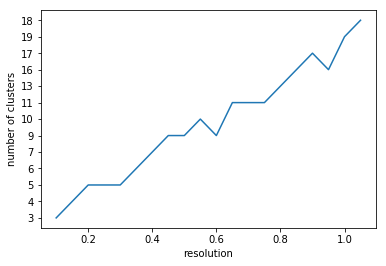

In [237]:
n_cluster = []
res = []
for i in range(20):
    sc.tl.leiden(IPadata,resolution = 0.1 + 0.05*i)
    (IPadata.obs['leiden'].values).sort_values(inplace=True)
    n_cluster.append(IPadata.obs['leiden'].values[-1])
    res.append(0.1 + 0.05*i)
    #print(i)
print(n_cluster)
print(res)
plt.plot(res,n_cluster)
plt.xlabel('resolution')
plt.ylabel('number of clusters')

In [295]:
sc.tl.leiden(IPadata,resolution = 0.15)

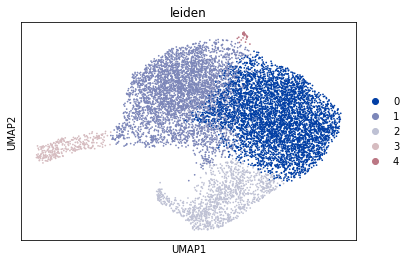

In [296]:
sc.pl.umap(IPadata, color=['leiden'])

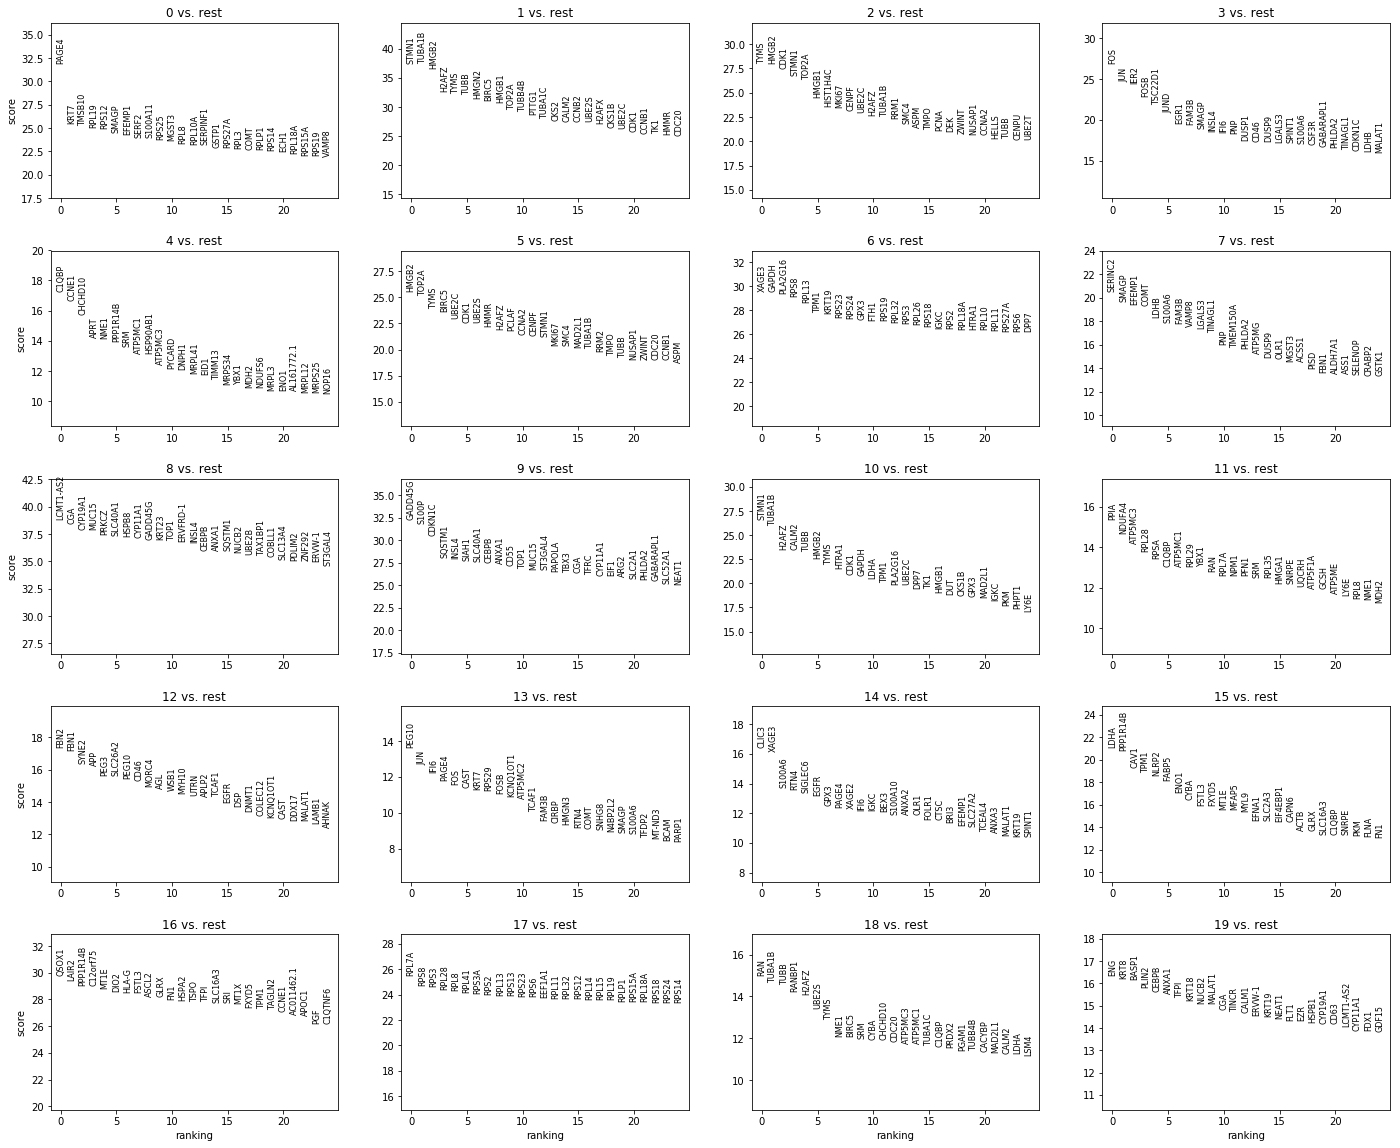

In [225]:
sc.tl.rank_genes_groups(IPadata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(IPadata, n_genes=25, sharey=False)

In [226]:
pd.DataFrame(IPadata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,PAGE4,STMN1,TYMS,FOS,C1QBP,HMGB2,XAGE3,SERINC2,LCMT1-AS2,GADD45G,STMN1,PPIA,FBN2,PEG10,CLIC3,LDHA,QSOX1,RPL7A,RAN,ENG
1,KRT7,TUBA1B,HMGB2,JUN,CCNE1,TOP2A,GAPDH,SMAGP,CGA,S100P,TUBA1B,NDUFA4,FBN1,JUN,XAGE3,PPP1R14B,LAIR2,RPS8,TUBA1B,KRT8
2,TMSB10,HMGB2,CDK1,IER2,CHCHD10,TYMS,PLA2G16,EFEMP1,CYP19A1,CDKN1C,H2AFZ,ATP5MC3,SYNE2,IFI6,S100A6,CAV1,PPP1R14B,RPS3,TUBB,BASP1
3,RPL19,H2AFZ,STMN1,FOSB,APRT,BIRC5,RPS8,COMT,MUC15,SQSTM1,CALM2,RPL28,APP,PAGE4,RTN4,TPM1,C12orf75,RPL28,RANBP1,PLIN2
4,RPS12,TYMS,TOP2A,TSC22D1,NME1,UBE2C,RPL13,LDHB,PRKCZ,INSL4,TUBB,RPSA,PEG3,FOS,SIGLEC6,NLRP2,MT1E,RPL8,H2AFZ,CEBPB


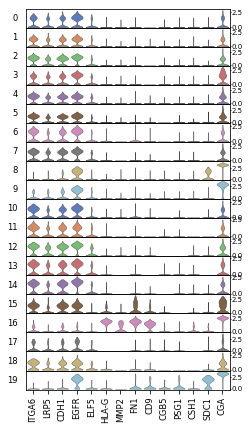

In [232]:
marker_genes = [ "ITGA6", "LRP5", "CDH1", "EGFR", "ELF5","HLA-G", "MMP2", "FN1","CD9","CGB5", "PSG1", "CSH1", "SDC1", "CGA"]
sc.pl.stacked_violin(IPadata, marker_genes, groupby='leiden', rotation=90)

In [246]:
IPadata

AnnData object with n_obs × n_vars = 10205 × 2280 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes', 'rank_genes_groups', 'draw_graph'
    obsm: 'X_pca', 'X_umap', 'X_tsne', 'X_draw_graph_fa'
    varm: 'PCs'

In [297]:
IPadata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4'], dtype='object')

In [298]:
new_IPadata = IPadata[~IPadata.obs['leiden'].isin(['4']),:]

In [299]:
new_IPadata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3'], dtype='object')

Trying to set attribute `.uns` of view, making a copy.


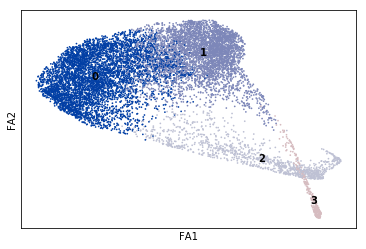

In [300]:
sc.tl.draw_graph(new_IPadata)
sc.pl.draw_graph(new_IPadata, color='leiden', legend_loc='on data',title = "")

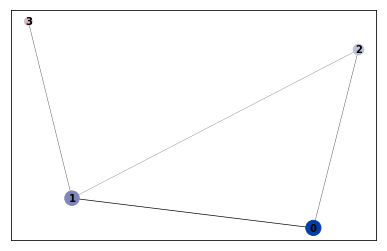

In [301]:
sc.tl.paga(new_IPadata, groups='leiden')
sc.pl.paga(new_IPadata, color=['leiden'],title = "")

In [310]:
new_IPadata.uns['iroot'] = np.flatnonzero(new_IPadata.obs['leiden'].cat.categories  == '1')[0]

In [311]:
sc.tl.dpt(new_IPadata)

In [312]:
sc.tl.draw_graph(new_IPadata, init_pos='paga')

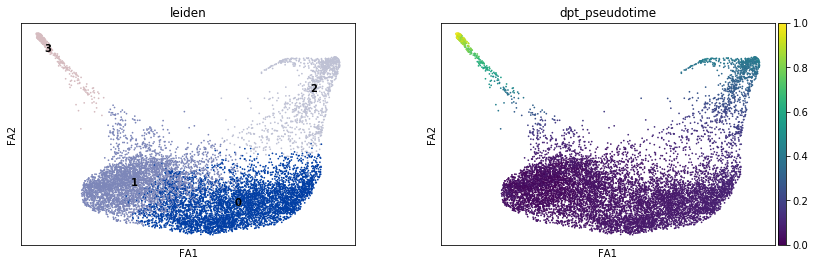

In [313]:
sc.pl.draw_graph(new_IPadata, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

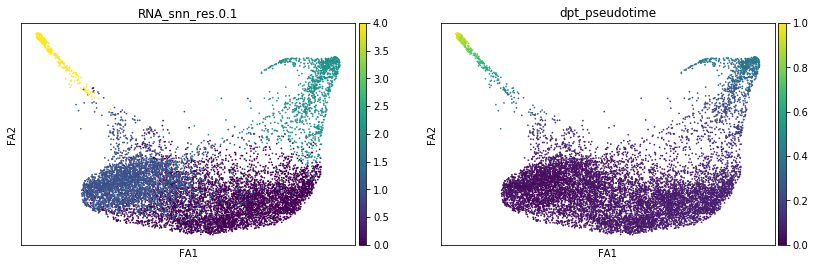

In [322]:
sc.pl.draw_graph(new_IPadata, color=['RNA_snn_res.0.1', 'dpt_pseudotime'], legend_loc='on data')

In [314]:
new_IPadata

AnnData object with n_obs × n_vars = 10179 × 2280 
    obs: 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.3', 'scHCL_celltype', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes', 'rank_genes_groups', 'draw_graph', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_tsne', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'

In [317]:
new_IPadata.obs['RNA_snn_res.0.1']

AAACCCACAGGATCTT    0
AAACCCACAGTCTGGC    1
AAACCCAGTGATATAG    0
AAACCCAGTTACGGAG    0
AAACCCAGTTGCCGAC    0
AAACCCATCCATTGCC    1
AAACCCATCCCATTCG    0
AAACCCATCTTACGGA    0
AAACGAACACAGTGTT    0
AAACGAACACCAATTG    1
AAACGAAGTTGCATTG    2
AAACGAATCAACGCTA    1
AAACGAATCTGACAGT    2
AAACGCTAGAGCAGTC    0
AAACGCTCAAGCGGAT    1
AAACGCTGTTGTTTGG    2
AAACGCTTCGAGAAGC    0
AAACGCTTCGATACTG    0
AAAGAACAGACTCCGC    0
AAAGAACCAAACACGG    1
AAAGAACCACAGTACT    0
AAAGAACCACCCAAGC    0
AAAGAACCATATCGGT    2
AAAGAACGTGCCTGCA    0
AAAGAACGTGGTAATA    0
AAAGAACTCACGAGGA    0
AAAGAACTCATAGCAC    0
AAAGAACTCTGAGCAT    0
AAAGGATAGGATACAT    2
AAAGGATAGGTCGTGA    0
                   ..
TTTGGAGAGGGCGAGA    2
TTTGGAGCAATCAAGA    1
TTTGGAGCACGGTCTG    0
TTTGGAGCAGCGATTT    0
TTTGGAGCATGCACTA    0
TTTGGAGCATTCTTCA    1
TTTGGAGGTCAACACT    0
TTTGGAGGTCACAGTT    0
TTTGGAGGTCTTGCGG    0
TTTGGAGTCCGGGACT    2
TTTGGAGTCTATCACT    0
TTTGGTTAGACCCGCT    1
TTTGGTTCACCAGCTG    0
TTTGGTTCAGACCAAG    0
TTTGGTTCAG

In [321]:
new_IPadata.obs['leiden'].equals(new_IPadata.obs['RNA_snn_res.0.1'])

False

In [1]:
import scvelo as scv

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.7.3) on 2021-01-07 10:41.


In [14]:
#Read data from loom file
scv_adata = scv.read('../BioInfo/ITGA6CT_cp.loom',cache = False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 12354 × 33538
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'>

In [23]:
#Make variables name unique
scv_adata.var_names_make_unique()

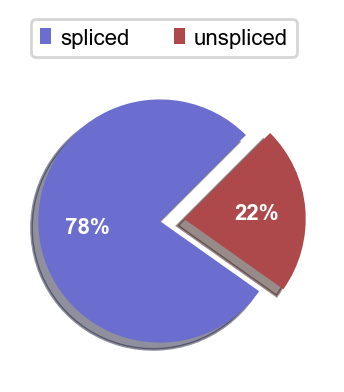

In [24]:
scv.pl.proportions(scv_adata)

In [25]:
#Show first fice rows of the obs field
scv_adata.obs.head(5)

,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition,leiden
ITGA6CT:AAAGAACCACAGTACTx,7506,3620,7506.0,546.610474,0.002118,0
ITGA6CT:AAAGTCCCAGACTCTAx,4580,5001,4580.0,782.876587,0.215146,5
ITGA6CT:AAAGGTAGTCTCGCGAx,8097,3335,8097.0,734.063293,0.105389,3
ITGA6CT:AAAGGGCTCTGTCGCTx,6713,1042,6713.0,430.949707,0.059018,1
ITGA6CT:AAACGAAGTATTCCTTx,688,155,688.0,297.009552,0.120620,2


In [26]:
#Show first fice rows of the var field
scv_adata.var.head(5)

,Accession,Chromosome,End,Start,Strand,gene_count_corr,means,dispersions,dispersions_norm,highly_variable,velocity_gamma,velocity_r2,velocity_genes
CCNL2,ENSG00000221978,1,1399328,1385711,-,-0.0492,0.150181,-0.378197,-0.392658,True,0.055169,-0.058496,False
KLHL21,ENSG00000162413,1,6614607,6590724,-,-0.0049,0.027304,-0.304678,-0.272164,True,0.209382,-0.112052,False
ERRFI1,ENSG00000116285,1,8026308,8004404,-,-0.0196,0.004085,-0.176718,0.317121,True,2.875059,-0.880077,False
ENO1,ENSG00000074800,1,8879250,8861000,-,0.4525,1.027000,-1.182813,-0.171651,True,0.019877,0.364430,True
GPR157,ENSG00000180758,1,9129170,9100305,-,-0.0671,0.151476,-0.336933,-0.124386,True,0.330818,-0.388001,False


In [27]:
#Preprocessing the data
scv.pp.filter_genes(scv_adata, min_shared_counts=10)
scv.pp.normalize_per_cell(scv_adata)
scv.pp.filter_genes_dispersion(scv_adata, n_top_genes=3000)
scv.pp.log1p(scv_adata)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [28]:
scv.pp.filter_and_normalize(scv_adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(scv_adata, n_pcs=30, n_neighbors=30)

Exctracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [29]:
#Computing velocities
scv.tl.velocity_graph(scv_adata)

computing velocity graph
    finished (0:01:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [30]:
import scanpy as sc

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


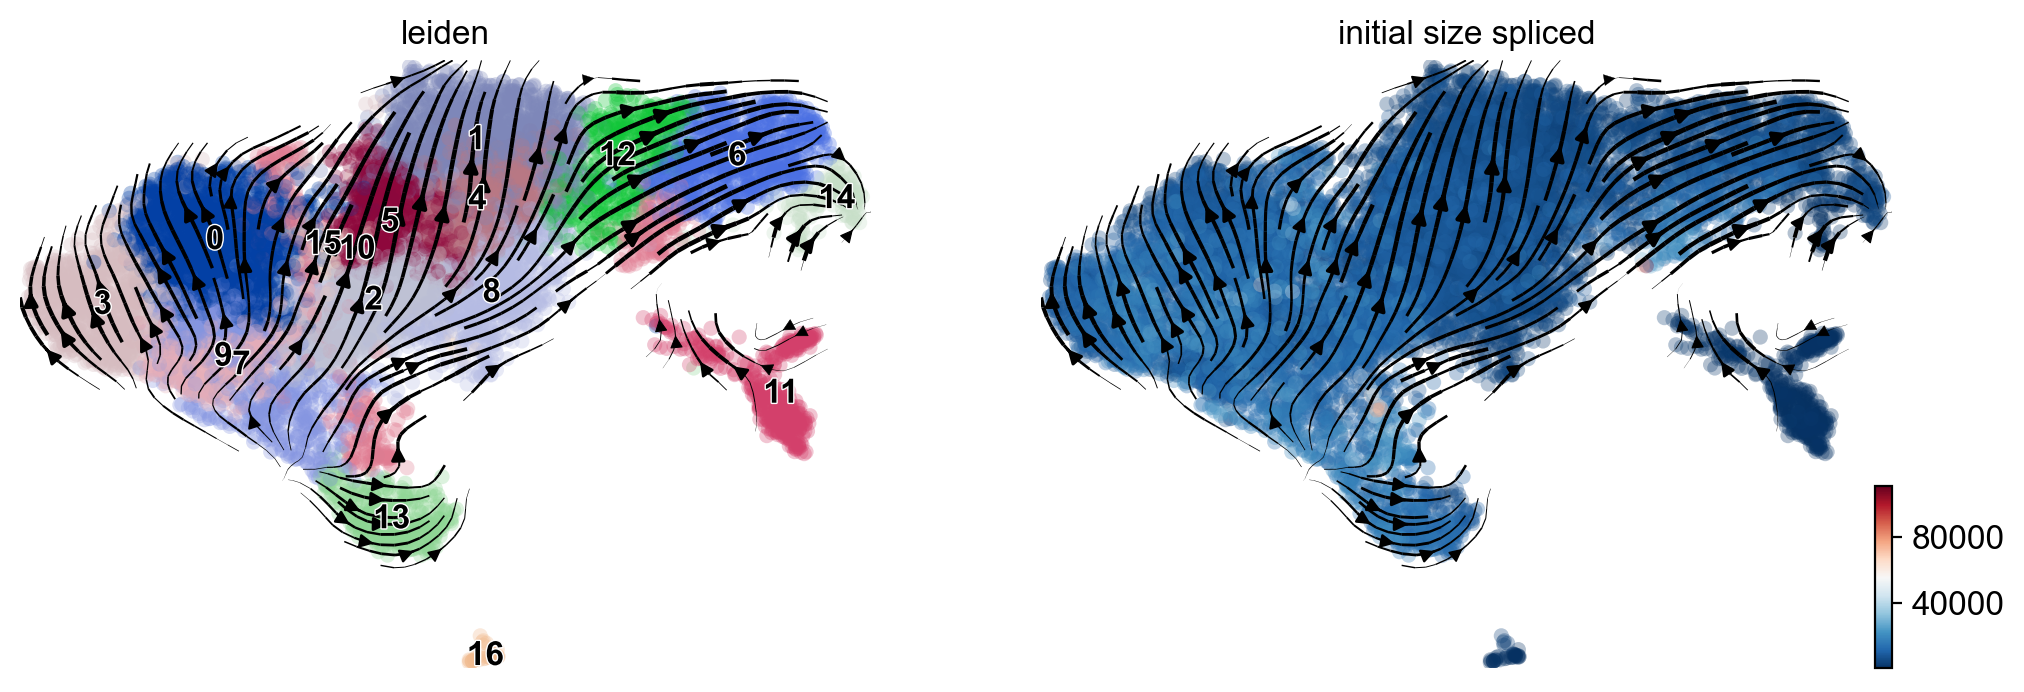

In [31]:
# Create UMAP in anndata structure
scv.pp.neighbors(scv_adata, n_neighbors=10, n_pcs=30)#Compute a neighborhood graph of observations
sc.tl.leiden(scv_adata)
vdata = scv_adata 
scv.tl.umap(scv_adata)
#Project the velocities
scv.pl.velocity_embedding_stream(scv_adata, basis='umap', color=['leiden','initial_size_spliced'])